In [88]:
!pip install graphviz

In [5]:
!pip install pydotplus

Processing /home/jovyan/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50/pydotplus-2.0.2-py3-none-any.whl


In [1]:
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plot
import numpy
import numpy as np
import pandas
import pandas as pnd
import pandas as pd
import calendar
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg
import graphviz
from sklearn.tree import export_graphviz
%matplotlib inline

In [2]:
df = pd.read_csv("flightdata.csv")

In [3]:
df.head(10)

,Unnamed: 0,YEAR,MONTH,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,...,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 22
0,0,2020,1,WN,13891,ONT,"Ontario, CA",CA,14771,SFO,...,2053.0,68.0,0.0,0.0,8.0,0.0,27.0,0.0,33.0,NaN
1,1,2020,1,WN,13891,ONT,"Ontario, CA",CA,14771,SFO,...,1318.0,-2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020,1,WN,13891,ONT,"Ontario, CA",CA,14831,SJC,...,2124.0,-6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020,1,WN,13891,ONT,"Ontario, CA",CA,14831,SJC,...,1505.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020,1,WN,13891,ONT,"Ontario, CA",CA,14831,SJC,...,1023.0,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2020,1,WN,13891,ONT,"Ontario, CA",CA,14831,SJC,...,722.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2020,1,WN,13891,ONT,"Ontario, CA",CA,14831,SJC,...,1736.0,-4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2020,1,WN,13891,ONT,"Ontario, CA",CA,14893,SMF,...,1717.0,47.0,0.0,0.0,0.0,0.0,0.0,7.0,40.0,NaN
8,8,2020,1,WN,13891,ONT,"Ontario, CA",CA,14893,SMF,...,1405.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2020,1,WN,13891,ONT,"Ontario, CA",CA,14893,SMF,...,904.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826726 entries, 0 to 5826725
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   YEAR                 int64  
 2   MONTH                int64  
 3   OP_UNIQUE_CARRIER    object 
 4   ORIGIN_AIRPORT_ID    int64  
 5   ORIGIN               object 
 6   ORIGIN_CITY_NAME     object 
 7   ORIGIN_STATE_ABR     object 
 8   DEST_AIRPORT_ID      int64  
 9   DEST                 object 
 10  DEST_CITY_NAME       object 
 11  DEST_STATE_ABR       object 
 12  DEP_DELAY            float64
 13  DEP_DELAY_NEW        float64
 14  ARR_TIME             float64
 15  ARR_DELAY            float64
 16  CANCELLED            float64
 17  DIVERTED             float64
 18  CARRIER_DELAY        float64
 19  WEATHER_DELAY        float64
 20  NAS_DELAY            float64
 21  SECURITY_DELAY       float64
 22  LATE_AIRCRAFT_DELAY  float64
 23  Unnamed: 22          float64
dty

In [4]:
df=df.drop('Unnamed: 22', axis=1)
df.dropna(inplace=True)
df.shape

(557116, 23)

In [8]:
df.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID',
       'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [6]:
a = []
for f in df['DEP_DELAY']:
    if f > 0:
        a.append('yes')
    else:
        a.append('no')
df['IS_DELAY']=a
df.head(10)

,Unnamed: 0,YEAR,MONTH,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,...,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,IS_DELAY
0,0,2020,1,WN,13891,ONT,"Ontario, CA",CA,14771,SFO,...,2053.0,68.0,0.0,0.0,8.0,0.0,27.0,0.0,33.0,yes
7,7,2020,1,WN,13891,ONT,"Ontario, CA",CA,14893,SMF,...,1717.0,47.0,0.0,0.0,0.0,0.0,0.0,7.0,40.0,yes
14,14,2020,1,WN,13931,ORF,"Norfolk, VA",VA,10821,BWI,...,1317.0,42.0,0.0,0.0,6.0,0.0,0.0,0.0,36.0,yes
24,24,2020,1,WN,14027,PBI,"West Palm Beach/Palm Beach, FL",FL,12391,ISP,...,1329.0,179.0,0.0,0.0,179.0,0.0,0.0,0.0,0.0,yes
29,29,2020,1,WN,14057,PDX,"Portland, OR",OR,11292,DEN,...,1658.0,28.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,yes
57,57,2020,1,WN,14057,PDX,"Portland, OR",OR,14893,SMF,...,1458.0,18.0,0.0,0.0,17.0,0.0,1.0,0.0,0.0,yes
62,62,2020,1,WN,14100,PHL,"Philadelphia, PA",PA,10693,BNA,...,1423.0,38.0,0.0,0.0,3.0,0.0,0.0,0.0,35.0,yes
87,87,2020,1,WN,14107,PHX,"Phoenix, AZ",AZ,10140,ABQ,...,1116.0,16.0,0.0,0.0,3.0,0.0,0.0,0.0,13.0,yes
118,118,2020,1,WN,14107,PHX,"Phoenix, AZ",AZ,11292,DEN,...,119.0,49.0,0.0,0.0,25.0,0.0,0.0,0.0,24.0,yes
132,132,2020,1,WN,14107,PHX,"Phoenix, AZ",AZ,11884,GEG,...,1516.0,16.0,0.0,0.0,11.0,0.0,0.0,0.0,5.0,yes


In [13]:
print(df.IS_DELAY.value_counts())

yes    448168
no     108948
Name: IS_DELAY, dtype: int64


In [14]:
df.describe()

,Unnamed: 0,YEAR,MONTH,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,5.571160e+05,557116.000000,557116.000000,557116.000000,557116.000000,557116.000000,557116.000000,557116.000000,557116.000000,557116.0,557116.0,557116.000000,557116.000000,557116.000000,557116.000000,557116.000000
mean,2.603475e+06,2020.224722,4.629819,12563.425728,12609.344772,56.915477,57.795996,1556.070949,62.581075,0.0,0.0,26.181468,4.989846,13.632391,0.158786,17.618584
std,1.766977e+06,0.417399,3.777480,1532.093766,1536.723530,99.390156,98.848851,551.649635,95.207828,0.0,0.0,76.267737,39.116964,31.159350,3.682437,49.713600
min,0.000000e+00,2020.000000,1.000000,10135.000000,10135.000000,-51.000000,0.000000,1.000000,15.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.112150e+06,2020.000000,2.000000,11292.000000,11292.000000,8.000000,8.000000,1219.000000,22.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.249434e+06,2020.000000,3.000000,12278.000000,12451.000000,34.000000,34.000000,1636.000000,35.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.172581e+06,2020.000000,8.000000,13930.000000,14027.000000,69.000000,69.000000,2004.000000,67.000000,0.0,0.0,25.000000,0.000000,19.000000,0.000000,16.000000
max,5.826723e+06,2021.000000,12.000000,16869.000000,16869.000000,3890.000000,3890.000000,2400.000000,3864.000000,0.0,0.0,3864.000000,1740.000000,1462.000000,1185.000000,2361.000000


In [15]:
correlation = df['DEP_DELAY'].corr(df['ARR_DELAY'])
correlation

0.9775492674975385

In [16]:
df['ORIGIN_CITY_NAME'].value_counts().idxmax()

'Dallas/Fort Worth, TX'

In [17]:
df['DEST_CITY_NAME'].value_counts().idxmax()

'Dallas/Fort Worth, TX'

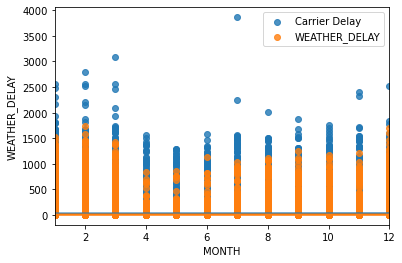

In [19]:
#Correlation of carrier and weather delay grouped by month
fig, axs = plt.subplots()
ax = sns.regplot(x='MONTH', y='CARRIER_DELAY', data=df, label='Carrier Delay')
sns.regplot(x='MONTH', y='WEATHER_DELAY', data=df, label='WEATHER_DELAY')
ax.legend(loc="best")

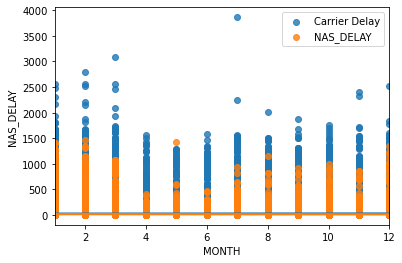

In [20]:
#Correlation of carrier and NAS delay grouped by month
fig, axs = plt.subplots()
ax = sns.regplot(x='MONTH', y='CARRIER_DELAY', data=df, label='Carrier Delay')
sns.regplot(x='MONTH', y='NAS_DELAY', data=df, label='NAS_DELAY')
ax.legend(loc="best")

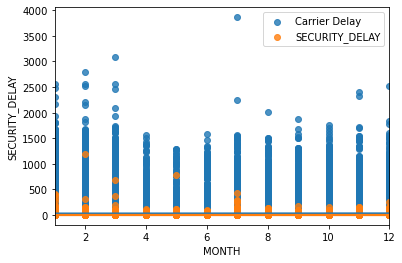

In [21]:
#Correlation of carrier and SECURITY_DELAY delay grouped by month
fig, axs = plt.subplots()
ax = sns.regplot(x='MONTH', y='CARRIER_DELAY', data=df, label='Carrier Delay')
sns.regplot(x='MONTH', y='SECURITY_DELAY', data=df, label='SECURITY_DELAY')
ax.legend(loc="best")

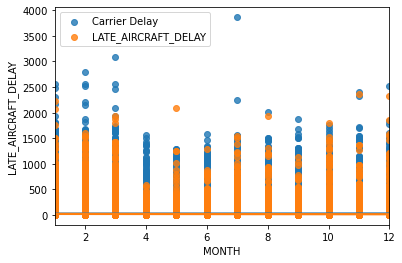

In [22]:
#Correlation of carrier and LATE_AIRCRAFT_DELAY delay grouped by month
fig, axs = plt.subplots()
ax = sns.regplot(x='MONTH', y='CARRIER_DELAY', data=df, label='Carrier Delay')
sns.regplot(x='MONTH', y='LATE_AIRCRAFT_DELAY', data=df, label='LATE_AIRCRAFT_DELAY')
ax.legend(loc="best")


In [7]:
#flight delays categorized by 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY' and grouped by month 

delayb = df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'MONTH']].copy()
delayb = delayb.groupby(['MONTH'])['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'].sum()
delayb['MONTH'] = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
delayb

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,MONTH
MONTH,,,,,,
1,2971818.0,606431.0,1753646.0,15200.0,2221182.0,Jan
2,3177302.0,836355.0,2044368.0,14050.0,2727386.0,Feb
3,2528789.0,263721.0,1293095.0,14805.0,1837884.0,Mar
4,350229.0,24809.0,93307.0,1210.0,88522.0,Apr
5,251530.0,29647.0,92506.0,2241.0,106777.0,May
6,407872.0,91436.0,146306.0,2292.0,195894.0,Jun
7,842584.0,181478.0,364196.0,7608.0,493861.0,Jul
8,749726.0,190342.0,359720.0,5211.0,399300.0,Aug
9,585972.0,112564.0,217716.0,6290.0,262844.0,Sep


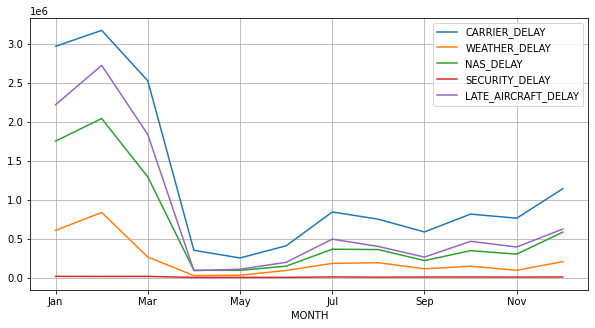

In [24]:
delayb.set_index('MONTH').plot(figsize=(10,5), grid=True)

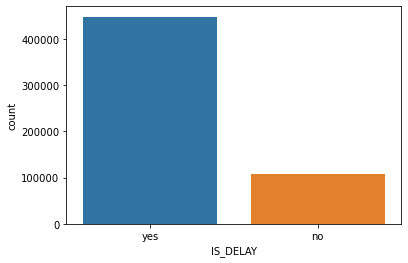

In [25]:
sns.countplot(x='IS_DELAY', data=df)

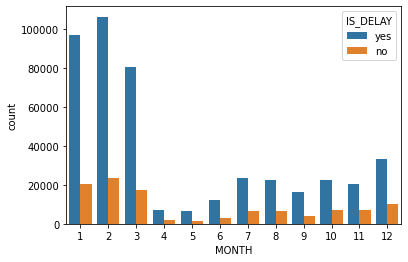

In [26]:
sns.countplot(x='MONTH', hue="IS_DELAY", data=df)

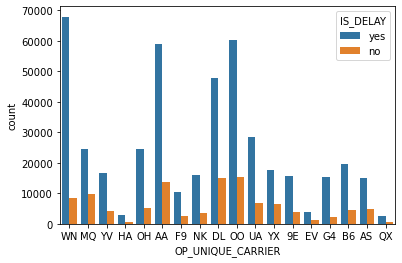

In [27]:
sns.countplot(x='OP_UNIQUE_CARRIER', hue="IS_DELAY", data=df)

In [28]:
df['IS_DELAY'] = df['IS_DELAY'].map({'yes': 1, 'no': 0})

In [29]:
#multiple linear regression
# can use multiple linear regression for predicting delay using more than one variable , good predictors of delay could be: 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'

X = df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

#From the sklearn module we will use the LinearRegression() method to create a linear regression object.

#This object has a method called fit() that takes the independent and dependent values as parameters and fills the regression object with data that describes the relationship:

LR = linear_model.LinearRegression()
LR.fit(X, df['IS_DELAY'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
LR.intercept_


0.7763954767739174

In [31]:
LR.coef_

array([ 0.00079278,  0.00069891, -0.0015501 ,  0.00253341,  0.00139245])

What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 + 𝑏3 𝑋3 + 𝑏4 𝑋4 + b5 X5
 
What is the linear function we get in this example?

delay = 0.7763954767739174 + 0.00079278 x CARRIER_DELAY + 0.00069891 x WEATHER_DELAY + -0.0015501 x NAS_DELAY + 0.00253341 x SECURITY_DELAY + 0.00139245 x LATE_AIRCRAFT_DELAY

In [26]:
#Logistic regression

In [76]:
feature_cols = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
X = df[feature_cols]
Y = df.IS_DELAY

In [77]:
X.head(3)

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,8.0,0.0,27.0,0.0,33.0
7,0.0,0.0,0.0,7.0,40.0
14,6.0,0.0,0.0,0.0,36.0


In [78]:
print(Y.value_counts())

1    448168
0    108948
Name: IS_DELAY, dtype: int64


In [79]:
x_train, x_test, y_train,y_test =train_test_split(X,Y, test_size=.15)

In [80]:
print(type(x_train), type(x_test),type(y_train),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [81]:
ytrain = pd.Series.to_frame(y_train)
ytest  = pd.Series.to_frame(y_test)
print(ytrain.head(),ytrain.columns, ytrain.IS_DELAY.head(), ytest.columns,ytest.IS_DELAY.head())

         IS_DELAY
5420166         1
1682532         1
559262          1
178027          1
4469444         0 Index(['IS_DELAY'], dtype='object') 5420166    1
1682532    1
559262     1
178027     1
4469444    0
Name: IS_DELAY, dtype: int64 Index(['IS_DELAY'], dtype='object') 1714967    1
5584888    1
1767648    0
1248478    1
2047401    1
Name: IS_DELAY, dtype: int64


In [82]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_Prediction = LR.predict(x_test)

In [83]:

## y_Prediction
print(np.count_nonzero(y_Prediction==0),np.count_nonzero(y_Prediction==1))

18765 64803


In [84]:
cnf_matrix = metrics.confusion_matrix(y_test, y_Prediction)
cnf_matrix

array([[13765,  2374],
       [ 5000, 62429]])

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 13765 and 62429 are actual predictions, and 5000 and 2374 are incorrect predictions.

Text(0.5, 257.44, 'Predicted label')

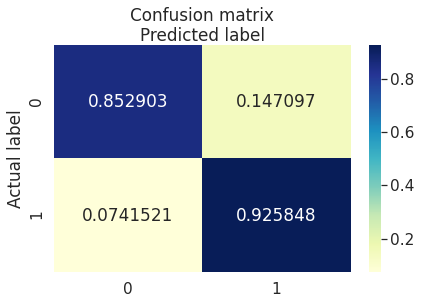

In [86]:
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9249648487749424
Precision: 0.9633197001718082
Recall: 0.9426033786347102


The logistic regression created for predicting delays has a 92% accuracy. The data used for the model were carrier, weather, nas, security and aircraft delay to train the model if a delay would occur. The presicion rate for the model is 96% and the Recall rateis 94%.

In [8]:
#Random forest
#First, you separate the columns into dependent and independent variables (or features and labels). 
#Then you split those variables into a training and test set.

X = df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']] #features
Y = df['IS_DELAY'] #labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test

In [9]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9255392347503515


In [72]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 27877,   4825],
       [  7716, 126717]])

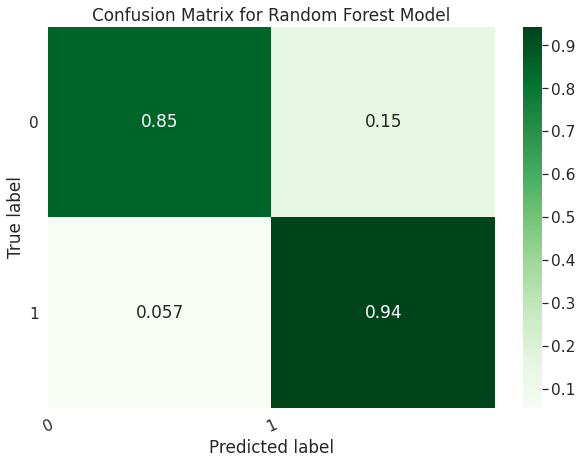

In [73]:
# Get and reshape confusion matrix data
cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cf_matrix, annot=True,
            cmap=plt.cm.Greens)

# Add labels to the plot
class_names = [0,1]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


In [51]:
clf.feature_importances_

array([0.24115203, 0.06904011, 0.52175606, 0.00445973, 0.16359207])